In [10]:
import numpy as np
import pandas as pd


In [11]:
data=pd.read_excel("/content/a1_Dataset_10Percent.xlsx")

In [12]:
data.head()


,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0
1,8415498,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1
2,12107603,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1
3,14400995,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1
4,28724674,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemClusterGroup  21549 non-null  object 
 4   DemGender        19711 non-null  object 
 5   DemReg           21758 non-null  object 
 6   DemTVReg         21758 non-null  object 
 7   LoyalClass       22223 non-null  object 
 8   LoyalSpend       22223 non-null  float64
 9   LoyalTime        21942 non-null  float64
 10  TargetBuy        22223 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 1.9+ MB


In [14]:
#analysing null values in the dataset
data.isna().sum()


,0
ID,0
DemAffl,1085
DemAge,1508
DemClusterGroup,674
DemGender,2512
DemReg,465
DemTVReg,465
LoyalClass,0
LoyalSpend,0
LoyalTime,281


In [15]:
#filling the missing values with either mean or the mode
data['DemAffl']=data['DemAffl'].fillna(data['DemAffl'].mode()[0])
data['DemAge']=data['DemAge'].fillna(data['DemAge'].mode()[0])
data['DemClusterGroup']=data['DemClusterGroup'].fillna(data['DemClusterGroup'].mode()[0])
data['DemGender']=data['DemGender'].fillna(data['DemGender'].mode()[0])
data['DemReg']=data['DemReg'].fillna(data['DemReg'].mode()[0])
data['DemTVReg']=data['DemTVReg'].fillna(data['DemTVReg'].mode()[0])
data['LoyalTime']=data['LoyalTime'].fillna(data['LoyalTime'].mean())

In [16]:
data.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,51.0,C,F,South East,London,Tin,0.01,5.00000,0
1,8415498,15.0,51.0,C,M,South East,London,Gold,8000.00,5.00000,1
2,12107603,8.0,51.0,C,M,Midlands,East,Tin,0.01,6.56467,1
3,14400995,8.0,28.0,C,F,South East,London,Tin,0.01,6.56467,1
4,28724674,14.0,67.0,C,F,South East,London,Tin,0.01,7.00000,0


In [17]:
data.isna().sum()

,0
ID,0
DemAffl,0
DemAge,0
DemClusterGroup,0
DemGender,0
DemReg,0
DemTVReg,0
LoyalClass,0
LoyalSpend,0
LoyalTime,0


In [18]:
#using label encoding to convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()


In [19]:
data['DemClusterGroup']=label_encoder.fit_transform(data['DemClusterGroup'])

In [20]:
data['DemClusterGroup'].unique()

array([2, 1, 4, 3, 5, 0, 6])

In [21]:
data['DemGender'].unique()

array(['F', 'M', 'U'], dtype=object)

In [22]:
data['DemGender']=label_encoder.fit_transform(data['DemGender'])

In [23]:
data['DemGender'].unique()

array([0, 1, 2])

In [24]:
data['DemReg'].unique()

array(['South East', 'Midlands', 'North', 'South West', 'Scottish'],
      dtype=object)

In [25]:
data['DemReg']=label_encoder.fit_transform(data['DemReg'])

In [26]:
data['DemReg'].unique()

array([3, 0, 1, 4, 2])

In [27]:
data['DemTVReg'].unique()

array(['London', 'East', 'Ulster', 'S & S East', 'Yorkshire',
       'Wales & West', 'N West', 'Midlands', 'S West', 'N East', 'N Scot',
       'C Scotland', 'Border'], dtype=object)

In [28]:
data['DemTVReg']=label_encoder.fit_transform(data['DemTVReg'])

In [29]:
data['DemTVReg'].unique()

array([ 3,  2, 10,  8, 12, 11,  7,  4,  9,  5,  6,  1,  0])

In [30]:
data['LoyalClass'].unique()

array(['Tin', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [31]:
data['LoyalClass']=label_encoder.fit_transform(data['LoyalClass'])

In [32]:
data['LoyalClass'].unique()

array([3, 0, 2, 1])

In [33]:
#count of customers in each loyal_class
data['LoyalClass'].value_counts()

,count
LoyalClass,
2,8572
3,6487
0,6324
1,840


In [34]:
data.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,51.0,2,0,3,3,3,0.01,5.00000,0
1,8415498,15.0,51.0,2,1,3,3,0,8000.00,5.00000,1
2,12107603,8.0,51.0,2,1,0,2,3,0.01,6.56467,1
3,14400995,8.0,28.0,2,0,3,3,3,0.01,6.56467,1
4,28724674,14.0,67.0,2,0,3,3,3,0.01,7.00000,0


In [35]:
df=data.drop(['ID'],axis=1)



In [36]:
df.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,51.0,2,0,3,3,3,0.01,5.00000,0
1,15.0,51.0,2,1,3,3,0,8000.00,5.00000,1
2,8.0,51.0,2,1,0,2,3,0.01,6.56467,1
3,8.0,28.0,2,0,3,3,3,0.01,6.56467,1
4,14.0,67.0,2,0,3,3,3,0.01,7.00000,0


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


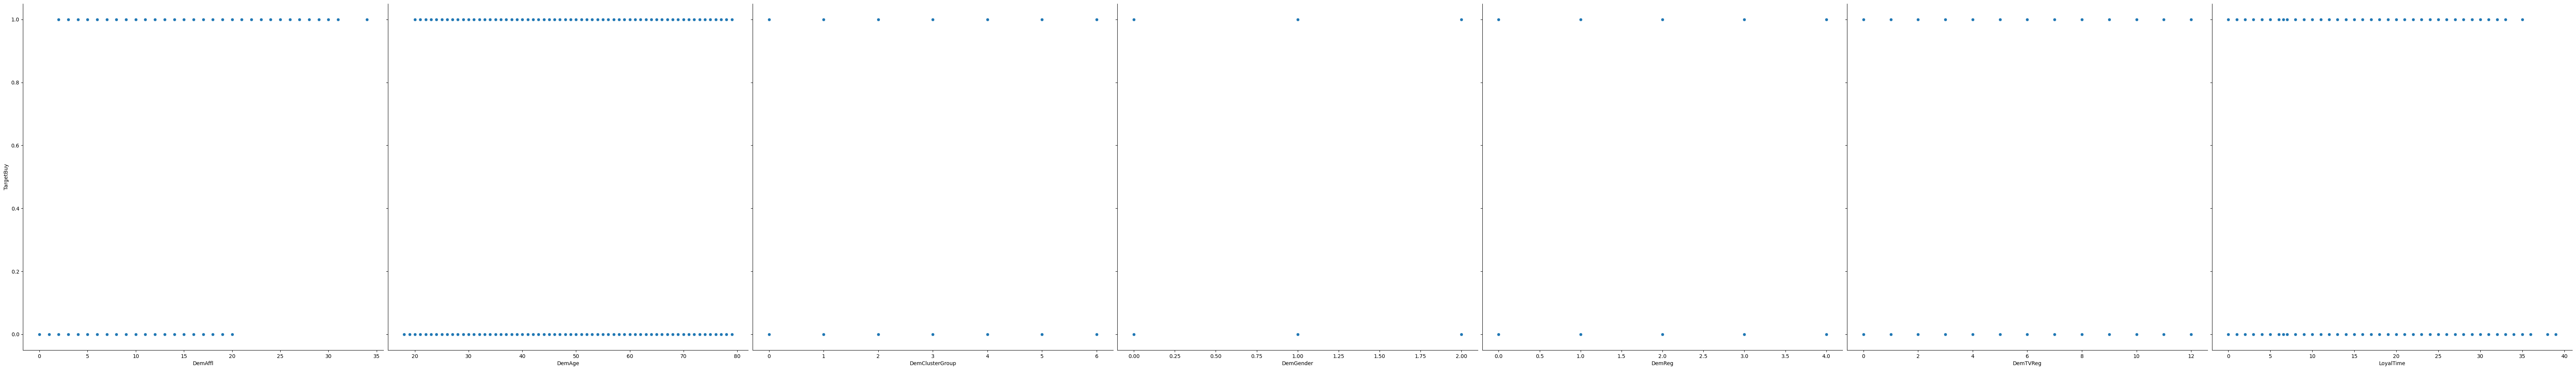

In [60]:
sns.pairplot(df,x_vars=['DemAffl','DemAge','DemClusterGroup','DemGender','DemReg','DemTVReg','LoyalTime'],y_vars=['TargetBuy'],size=10)
plt.show()

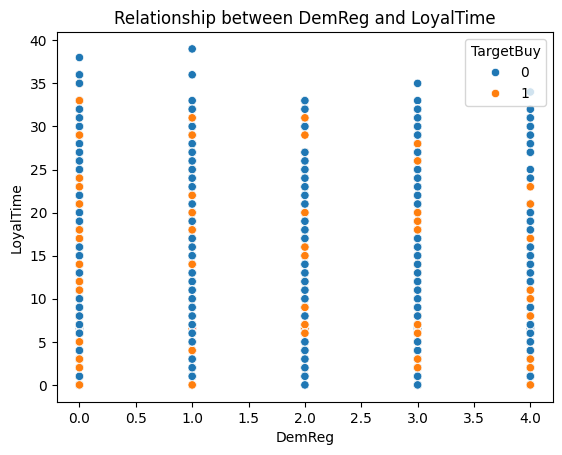

In [57]:
sns.scatterplot(x='DemReg', y='LoyalTime', data=data, hue='TargetBuy')
plt.title('Relationship between DemReg and LoyalTime')
plt.xlabel('DemReg')
plt.ylabel('LoyalTime')
plt.show()

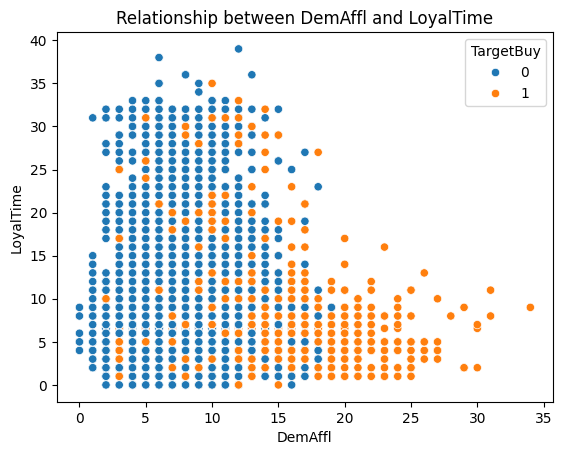

In [54]:
sns.scatterplot(x='DemAffl', y='LoyalTime', data=data, hue='TargetBuy')
plt.title('Relationship between DemAffl and LoyalTime')
plt.xlabel('DemAffl')
plt.ylabel('LoyalTime')
plt.show()

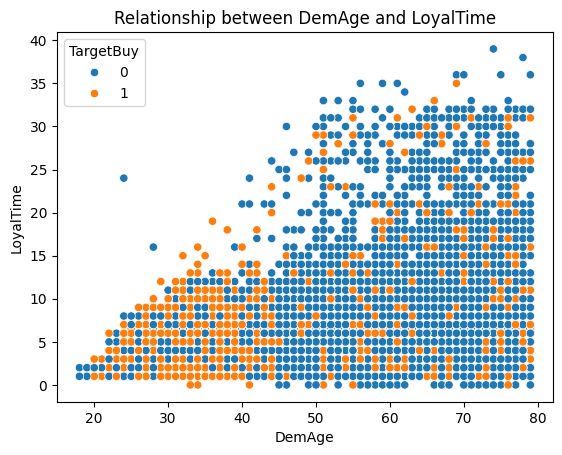

In [56]:
sns.scatterplot(x='DemAge', y='LoyalTime', data=data, hue='TargetBuy')
plt.title('Relationship between DemAge and LoyalTime')
plt.xlabel('DemAge')
plt.ylabel('LoyalTime')
plt.show()

In [37]:
x=data.drop(['TargetBuy'],axis=1)#independent variable
y=df['TargetBuy'] #dependent variables

In [38]:
#splitting the data for training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.95)

In [39]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [40]:
classifier.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
predictions=classifier.predict(x_test)#predictions

In [42]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm=confusion_matrix(predictions,y_test)


In [43]:
ac=accuracy_score(predictions,y_test)

In [44]:
print(cm)

[[792 180]
 [ 52  88]]


In [45]:
print(ac)

0.7913669064748201


In [46]:
#when you have categorical data always use mode
# continuos data use mean data